**Title: TRIP BY DISTANCE IN US (2019-2023)**

**1. Problem Statement:** 

Traffic congestion in the US has gotten worse over the past year. According to Inrix, the average driver in the US spent time 29% more than in 2021, equivalent to $134 more spent on fuel in a year. This problem is expected as US population has steadily increased by 300 million people every year. By modelling the population movements in distance and frequencies over time, the pattern can be analyzed to  determine the areas with significant changes that require attention by the town ship planner. Modelling and forecasting can be done by counties, states and nationwide level. Necessary development such as increasing public transport coverage and frequencies, adding more highways or smart traffic lights shall be evaluated for future needs. Chicago will be a focused city, as it is the second-most congested city in the world in 2022.


S – I will use ARIMA in Time Series analysis, and develop a prediction model using Seasonal and Trend decomposition using Loess & Granger Causality Analysis
M – using Cross Validation and RMSE as a metric to measure accuracy
A – Yes it is achievable, data is organized and abundant with small amount of dependant variables.
R – It is relevant to the:
	1. Local and federal town planners can plan for commercial/residential areas, 
	2. Marketing analyst and businesses understand changes in consumers’ needs and its relevance (supermarket/childcare/setting up new 	offices). 
	3. Value added in making decisions: 
		For example: Should a company setup and office close to the residential area or it doesn’t matter where if people are willing to travel. 
				Should district office add more roads/highways/public transports as people prefer to travel more?
T – I plan to finish by 1st of July. 

**2. Proposed Methods and Models:**

1. Time Series Model, 
2. Time Series Visualization,
3. Autoregressive Integrated Moving Average (ARIMA) (models the next value in a time series based on linear combination of its own past values and past forecast errors)

Forecasting: 
    1. Seasonal and Trend decomposition using Loess (modeling and forecasting each component separately), 
    2. Granger Causality Analysis (determines whether one time series can predict future values of another time series)


**3. Risks and Assumptions:**

1. Steep learning curve
2. Time constraint

**4. Revised Initial Goals and Success Criteria:**

Initial goals to have a time series model of accuracy >90%, less than 1 MAE, with as low as possible RMSE.

**5. Data Source:**
1. https://www.kaggle.com/datasets/adelanseur/trips-by-distance
2. Time Series Analysis and Forecasting – GeeksforGeeks
3. The Complete Guide to Time Series Forecasting Models | by Peter Wainaina | Medium


In [115]:
!pip install kaggle
!pip install opendatasets

In [116]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/adelanseur/trips-by-distance'
od.download('https://www.kaggle.com/datasets/adelanseur/trips-by-distance')

Skipping, found downloaded files in ".\trips-by-distance" (use force=True to force download)


In [117]:
import os

# Print the current working directory
print(os.getcwd())


C:\Users\60149\Documents\Data Science Peoplelogy


In [118]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller

In [119]:
import os
import zipfile

import pandas as pd

# Install the Kaggle API if not already installed
!pip install kaggle

# Set up Kaggle API credentials (ensure kaggle.json is correctly placed)
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser("~/.kaggle")

# Download the dataset
!kaggle datasets download -d adelanseur/trips-by-distance -p ./trips-by-distance

# Unzip the downloaded file
zip_file_path = r'./trips-by-distance/trips-by-distance.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(r'./trips-by-distance')

# List files in the extracted directory to verify the correct file name
extracted_path = r'./trips-by-distance/'
print("Files in extracted directory:", os.listdir(extracted_path))

# Load the CSV file into a DataFrame
# Use the correct file name from the list of files
csv_file_path = os.path.join(extracted_path, 'Trips_by_Distance.csv')  # Adjust the file name if necessary
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


Dataset URL: https://www.kaggle.com/datasets/adelanseur/trips-by-distance
License(s): CC0-1.0
trips-by-distance.zip: Skipping, found more recently modified local copy (use --force to force download)
Files in extracted directory: ['trips-by-distance.zip', 'Trips_by_Distance.csv']


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158310 entries, 0 to 5158309
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Level                           object 
 1   Date                            object 
 2   State FIPS                      float64
 3   State Postal Code               object 
 4   County FIPS                     float64
 5   County Name                     object 
 6   Population Staying at Home      float64
 7   Population Not Staying at Home  float64
 8   Number of Trips                 float64
 9   Number of Trips <1              float64
 10  Number of Trips 1-3             float64
 11  Number of Trips 3-5             float64
 12  Number of Trips 5-10            float64
 13  Number of Trips 10-25           float64
 14  Number of Trips 25-50           float64
 15  Number of Trips 50-100          float64
 16  Number of Trips 100-250         float64
 17  Number of Trips 250-500    

In [121]:
df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [122]:
df.describe()

,State FIPS,County FIPS,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month
count,5.156695e+06,5.074330e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.115449e+06,5.158310e+06,5.158310e+06
mean,3.025900e+01,3.038365e+04,6.766491e+04,2.427314e+05,1.179534e+06,3.072196e+05,2.868247e+05,1.432955e+05,1.818810e+05,1.743175e+05,5.604225e+04,1.886522e+04,8.090436e+03,1.715701e+03,1.282561e+03,2.476223e+01,6.193808e+00
std,1.515153e+01,1.516010e+04,1.323646e+06,4.639720e+06,2.309058e+07,6.055135e+06,5.611198e+06,2.806186e+06,3.566442e+06,3.420485e+06,1.093939e+06,3.680445e+05,1.600506e+05,3.392067e+04,2.778490e+04,1.509128e+01,3.463060e+00
min,1.000000e+00,1.001000e+03,8.000000e+00,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.800000e+01,1.817700e+04,2.020000e+03,9.333000e+03,4.386100e+04,9.275000e+03,9.549000e+03,4.282000e+03,5.951000e+03,7.056000e+03,3.500000e+03,1.280000e+03,4.330000e+02,5.800000e+01,1.500000e+01,1.200000e+01,3.000000e+00
50%,2.900000e+01,2.917600e+04,4.855000e+03,2.200600e+04,1.050570e+05,2.319800e+04,2.513400e+04,1.195500e+04,1.502400e+04,1.680300e+04,7.421000e+03,2.763000e+03,9.850000e+02,1.590000e+02,5.100000e+01,2.300000e+01,6.000000e+00
75%,4.500000e+01,4.508100e+04,1.439800e+04,6.021700e+04,2.900090e+05,6.760000e+04,7.243200e+04,3.566300e+04,4.373900e+04,4.440300e+04,1.712600e+04,6.195000e+03,2.405000e+03,4.350000e+02,1.970000e+02,3.800000e+01,9.000000e+00
max,5.600000e+01,5.604500e+04,1.102118e+08,2.737400e+08,1.611588e+09,4.736445e+08,4.051305e+08,1.980184e+08,2.526118e+08,2.565096e+08,7.636732e+07,2.873561e+07,1.447698e+07,3.651375e+06,5.003062e+06,5.200000e+01,1.200000e+01


In [123]:
df.isnull().sum()

Level                                 0
Date                                  0
State FIPS                         1615
State Postal Code                  1615
County FIPS                       83980
County Name                       83980
Population Staying at Home        42861
Population Not Staying at Home    42861
Number of Trips                   42861
Number of Trips <1                42861
Number of Trips 1-3               42861
Number of Trips 3-5               42861
Number of Trips 5-10              42861
Number of Trips 10-25             42861
Number of Trips 25-50             42861
Number of Trips 50-100            42861
Number of Trips 100-250           42861
Number of Trips 250-500           42861
Number of Trips >=500             42861
Row ID                                0
Week                                  0
Month                                 0
dtype: int64

In [124]:
# Upon early investigation,null values occur in the "summary" data. The main data consists on data on each county and states. 
# Null values occur for example in the state level, without putting in the county name and FIPS. 
# Also occur in National level, where states and counties name & FIPS are not included.
# All null values are dropped, but not ignored. In fact it is redundant and can be obtained from the details data.
df.dropna(inplace=True)

About the data:
1. The data is sorted according to national level and county level. 
2. For National level, column for state and county is missing. It is sorted daily info (1/1/2019 - 5/6/2021)
3. For State level, column for county is missing. It is sorted Date>>State>>data. Sorted daily (1/1/2019 -5/6/2021) 
3. For County level, the data is sorted according to Month>>week>>date>>state>>county>>the rest of data

1/1/2019,Month 1, week 1, , Wyoming, Sublette County, then the data.
The data is updated daily for each county

In [125]:
# Visualization
# 1. [National level] States (all no of trips) vs Year (trend increase/decrease)
# 2. [state level] Sum of States (all no of trips) vs Year (trend increase/decrease)
# 2. [County Level] select Sum of highest populated county in each state yearly (all no of trips) vs Year (trend increase/decrease)

In [126]:
# No of States in the data
len(df['State FIPS'].unique())

51

In [127]:
# No of Counties in the data
len(df['County FIPS'].unique())

3141

<Axes: >

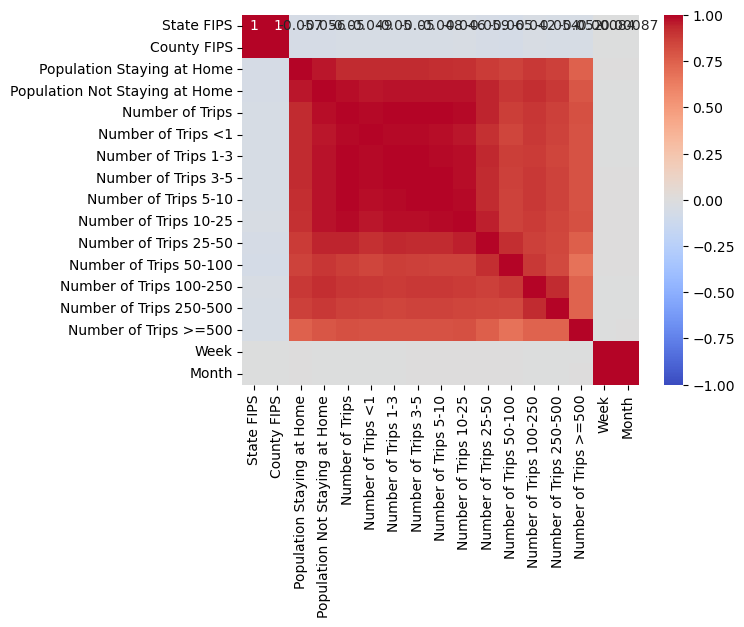

In [130]:
sns.heatmap(df.drop(columns=['Level','State Postal Code','County Name']).corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [128]:

# Assuming 'df' is your DataFrame and it's already loaded

# Check the column names and replace 'Date' with the correct date column name
print(df.columns)

# Ensure the index is a DateTimeIndex and sort it
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'YourDateColumnName' with the actual date column name
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Filter the DataFrame for rows where the 'County Name' is "Cook County" and 'State Postal Code' is "IL"
df_filtered = df[(df['County Name'] == "Cook County") & (df['State Postal Code'] == "IL")]

# Ensure the DataFrame is sorted by date
df_filtered = df_filtered.sort_index()

# # Handle missing dates by reindexing
# all_dates = pd.date_range(start=df_filtered.index.min(), end=df_filtered.index.max(), freq='D')
# df_filtered = df_filtered.reindex(all_dates)




Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')


In [129]:
# Drop Row ID column
df = df.drop(['Row ID'], axis=1)

In [139]:
# Create the time series from the 'Number of Trips' column
ts = df_filtered['Number of Trips']
ts

Date
2019-01-01     243284.0
2019-01-01    2051594.0
2019-01-01     165062.0
2019-01-01      47141.0
2019-01-01      62426.0
                ...    
2023-06-03     967310.0
2023-06-03     167547.0
2023-06-03     187683.0
2023-06-03      86917.0
2023-06-03     255418.0
Name: Number of Trips, Length: 164668, dtype: float64

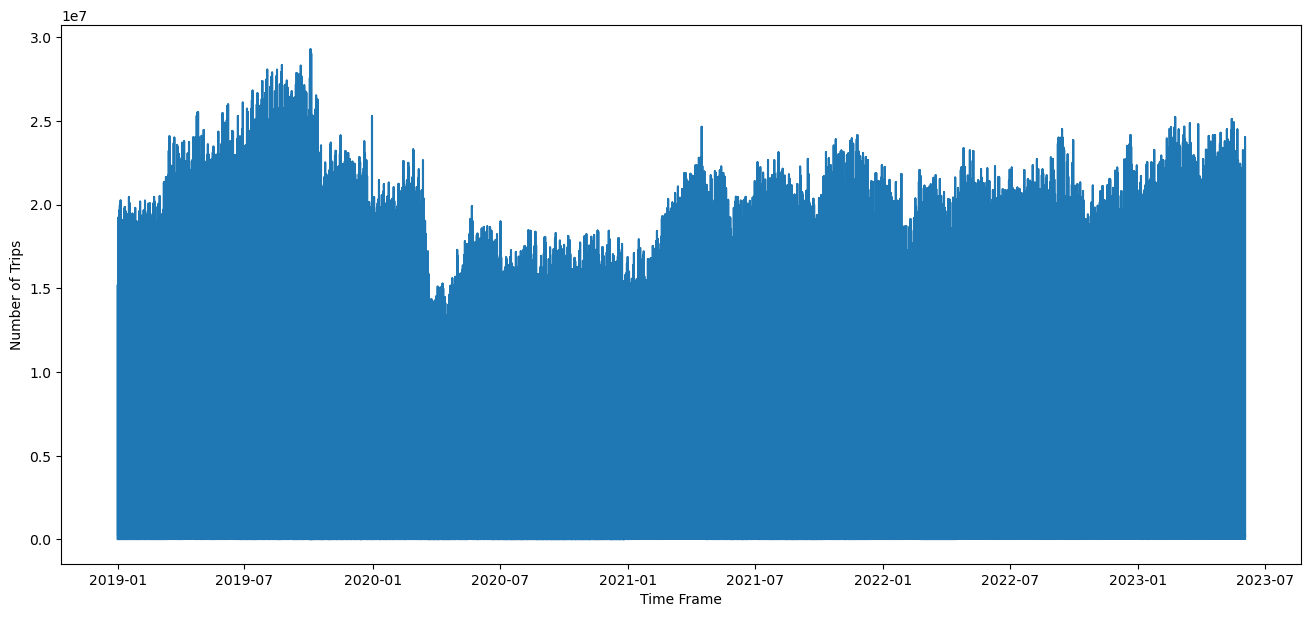

In [132]:
# Plot No of trips in IL state over time.
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Number of Trips')
ax1.plot(ts)

In [133]:
# Perform Augmented Dickey-Fuller test, to check stationarity.
# ADF Test - null hypothesis - data is non-stationary 
# if p-value < 5% reject null hypothesis
# Result: p-value < 5%, data is stationary

adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -59.26363805290494
p-value: 0.0
Critial Values:
   1%, -3.430389731224605
Critial Values:
   5%, -2.8615575606547496
Critial Values:
   10%, -2.5667793469088016


In [142]:
# Define the ARIMA model
newmodel = ARIMA(ts, order=(1, 1, 1))

# Fit the model
results = newmodel.fit()

# Make predictions
# Ensure that your dates are in the correct datetime format
start_date = '2022-01-06'
end_date = '2023-01-06'
predictions = results.predict(start=start_date, end=end_date).rename('ARIMA predictions')

# Print the predictions
print(predictions)

pred.plot(legend=True)
test['Number of Trips'].plot(legend=True)


Date
2022-01-06    548629.455308
2022-01-06    542932.905894
2022-01-06    549323.640209
2022-01-06    548322.056281
2022-01-06    544086.163735
                  ...      
2023-01-05    544322.263060
2023-01-05    545977.911042
2023-01-05    548455.821344
2023-01-05    548054.233405
2023-01-06    546153.967155
Name: ARIMA predictions, Length: 37231, dtype: float64


ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x0000027B9E76F6A0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>

In [135]:
df_filtered.head()

,Level,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Week,Month
Date,,,,,,,,,,,,,,,,,,,,
2019-01-01,County,17.0,IL,17199.0,Williamson County,15580.0,51017.0,243284.0,63107.0,69443.0,25371.0,39582.0,28741.0,9969.0,4493.0,1971.0,455.0,152.0,0,1
2019-01-01,County,17.0,IL,17197.0,Will County,158183.0,532560.0,2051594.0,502804.0,506038.0,247862.0,317254.0,277372.0,146851.0,26154.0,18716.0,4861.0,3682.0,0,1
2019-01-01,County,17.0,IL,17195.0,Whiteside County,12530.0,42645.0,165062.0,36040.0,44486.0,22108.0,22014.0,23011.0,9717.0,4640.0,2494.0,450.0,102.0,0,1
2019-01-01,County,17.0,IL,17193.0,White County,3049.0,10488.0,47141.0,9808.0,12621.0,4708.0,6688.0,7099.0,3755.0,1866.0,507.0,73.0,16.0,0,1
2019-01-01,County,17.0,IL,17191.0,Wayne County,3184.0,13031.0,62426.0,13809.0,17113.0,5386.0,7306.0,10272.0,6154.0,1714.0,507.0,138.0,27.0,0,1


In [136]:
# Get the actual values for the specified date range
actuals = df_filtered.loc[start_date:end_date, 'Number of Trips'].iloc[:13]

# Print the predictions and actuals
print("Predictions:")
print(predictions)
print("Actuals:")
print(actuals)

Predictions:
Date
2022-01-06    548629.455308
2022-01-06    542932.905894
2022-01-06    549323.640209
2022-01-06    548322.056281
2022-01-06    544086.163735
                  ...      
2023-01-05    544322.263060
2023-01-05    545977.911042
2023-01-05    548455.821344
2023-01-05    548054.233405
2023-01-06    546153.967155
Name: predicted_mean, Length: 37231, dtype: float64
Actuals:
Date
2022-01-06    326710.0
2022-01-06     30716.0
2022-01-06     71626.0
2022-01-06    261667.0
2022-01-06     26129.0
2022-01-06    145013.0
2022-01-06     18034.0
2022-01-06     77626.0
2022-01-06     56079.0
2022-01-06    987875.0
2022-01-06    156492.0
2022-01-06     83324.0
2022-01-06    322278.0
Name: Number of Trips, dtype: float64


In [137]:
# Train & Test
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])


(5031439, 20) (30, 20)
Level                                        County
State FIPS                                     22.0
State Postal Code                                LA
County FIPS                                 22007.0
County Name                       Assumption Parish
Population Staying at Home                   4261.0
Population Not Staying at Home              17630.0
Number of Trips                            104920.0
Number of Trips <1                          22334.0
Number of Trips 1-3                         21957.0
Number of Trips 3-5                         14901.0
Number of Trips 5-10                        15404.0
Number of Trips 10-25                       20624.0
Number of Trips 25-50                        6596.0
Number of Trips 50-100                       2597.0
Number of Trips 100-250                       379.0
Number of Trips 250-500                       115.0
Number of Trips >=500                          13.0
Week                                     

In [140]:
# 5 HOUR RUN
# Train the model
model=ARIMA(train['Number of Trips'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Number of Trips   No. Observations:              5031439
Model:                 ARIMA(1, 0, 5)   Log Likelihood           -77417333.770
Date:                Fri, 07 Jun 2024   AIC                      154834683.540
Time:                        17:29:21   BIC                      154834790.989
Sample:                             0   HQIC                     154834711.322
                            - 5031439                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.911e+05   1.47e-11   2.67e+16      0.000    3.91e+05    3.91e+05
ar.L1          0.9660      0.000   5102.864      0.000       0.966       0.966
ma.L1         -0.9201      0.000  -2710.874      0.000      -0.921      -0.919
ma.L2         -0.0058      0.000    -12.872      0.000      -0.007      -0.005
ma.L3          0.0206      0.000     49.856      0.000       0.020       0.021
ma.L4          0.0044      0.000     13.232      0.000       0.004       0.005
ma.L5         -0.0185      0.000    -71.662      0.000      -0.019      -0.018
sigma2      1.361e+12   5.44e-16    2.5e+27      0.000    1.36e+12    1.36e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):       17141977865.27
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            12.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       287.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.23e+40. Standard errors may be unstable.
"""

In [141]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Number of Trips'].plot(legend=True)

ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x0000027B9E76F6A0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal 5282065.85 converts to 16431-10-21T20:23:59.999936 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>

NameError: name 'mdates' is not defined

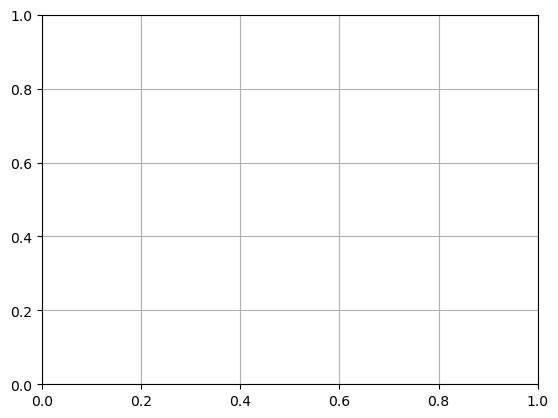

In [138]:
fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1) 

year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m') 

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(df_load.index, df_load, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='white')